<a href="https://colab.research.google.com/github/VS-Lucas/Clustering/blob/main/KMedoids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instalando biblioteca extra para execução do kMedoids**


In [143]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Instalando bibliotecas:**

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

**Fazendo a leitura da base de dados:**

In [195]:
download_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(download_url)

**Analisando dataset**

In [196]:
df.describe(include = "all")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# **Normalizando os dados e criando o modelo:**

In [200]:
class BuildModel:
  def __init__(self, df):
    self.df = df

  def get_features(self, data):
    return data.iloc[:, 3:5]

  def get_model(self):
    return KMedoids()
  
  def normalize(self):
    data = self.df.values
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)

    return pd.DataFrame(normalized_data)


k_medoids = BuildModel(df)
normalized_data = k_medoids.normalize()
features = k_medoids.get_features(data=normalized_data)

# Utilizando o método do "cotovelo"  
Esse método é utilizado para determinar o número ideal de clusters em um conjunto de dados. 

O número de clusters identificado no ponto do "cotovelo" é considerado o número ideal para aquele conjunto de dados. Isso porque, ao adicionar mais clusters, pode ocorrer a separação de grupos muito semelhantes, o que pode levar a uma diminuição da eficiência do modelo.

**Com esses dados temos que um K ótimo será K = 3**

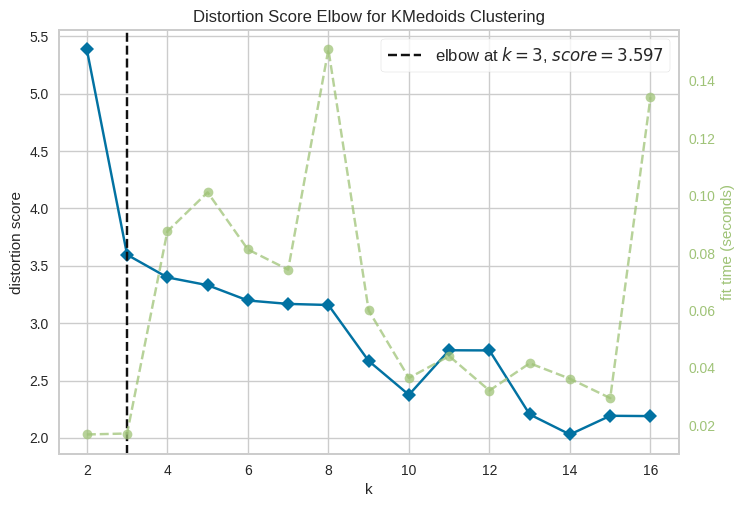

<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [201]:
model = k_medoids.get_model()
visualizer = KElbowVisualizer(model, k=(2,17))
visualizer.fit(features) 
visualizer.poof()

# Gerando o plot e utilizando o método Sillhoutte

Este método é geralemnte usado para avaliar a qualidade do agrupamento de dados comparando a distância média entre as amostras do mesmo cluster (coesão) com a distância média das amostras de diferentes clusters (separação).

**Podemos confirmar que a partir do K = 3 obtido no método do cotovelo clusteres acima disso torna o modelo ruim.**


**Rodando o método de Sillhoutte podemos ver que o cluster com K=2 é a melhor opção a se escolher!!**

****************************************************************************************************


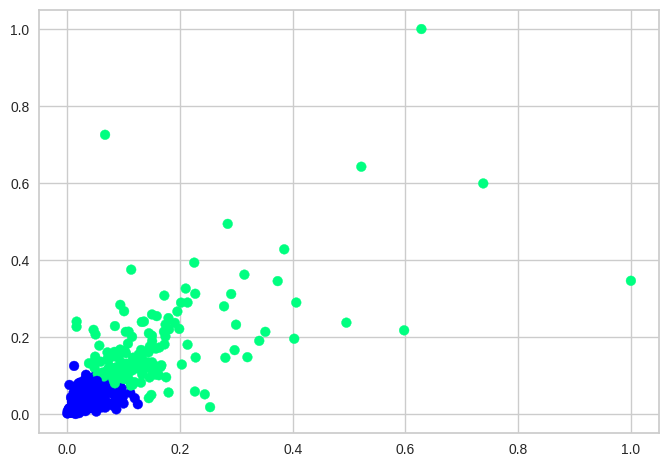


<< SILHOUETTE PARA K=2: 0.5287684708740761 >>

****************************************************************************************************
****************************************************************************************************


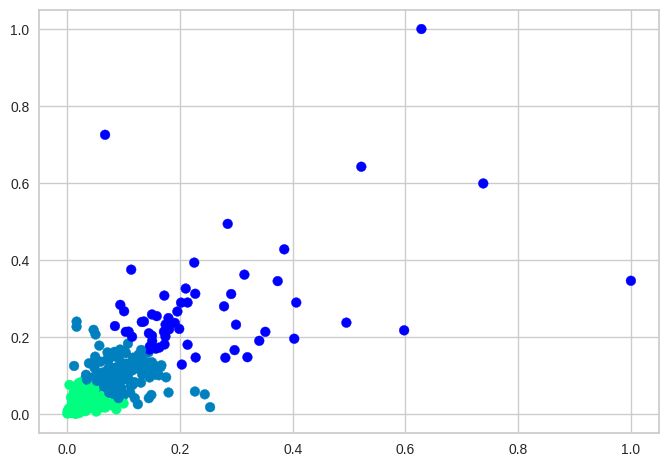


<< SILHOUETTE PARA K=3: 0.48355164609077067 >>

****************************************************************************************************
****************************************************************************************************


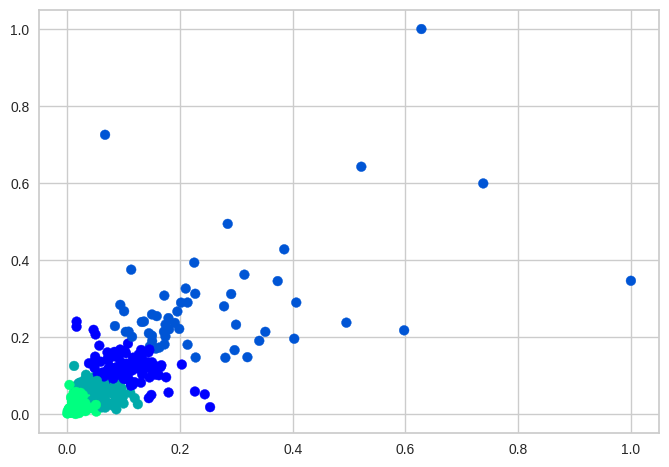


<< SILHOUETTE PARA K=4: 0.37701175523159486 >>

****************************************************************************************************
****************************************************************************************************


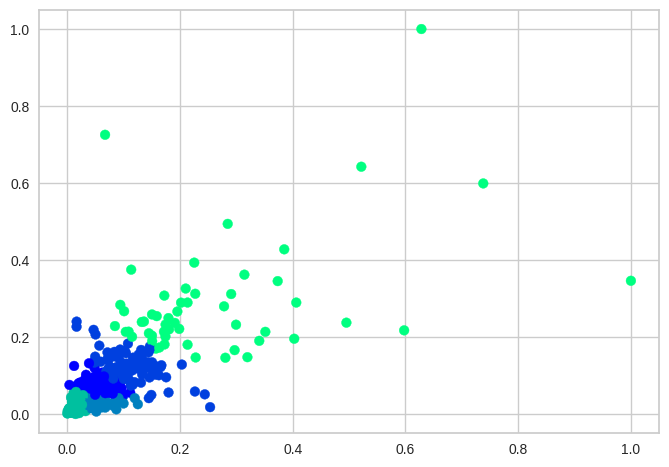


<< SILHOUETTE PARA K=5: 0.31501834148387525 >>

****************************************************************************************************
****************************************************************************************************


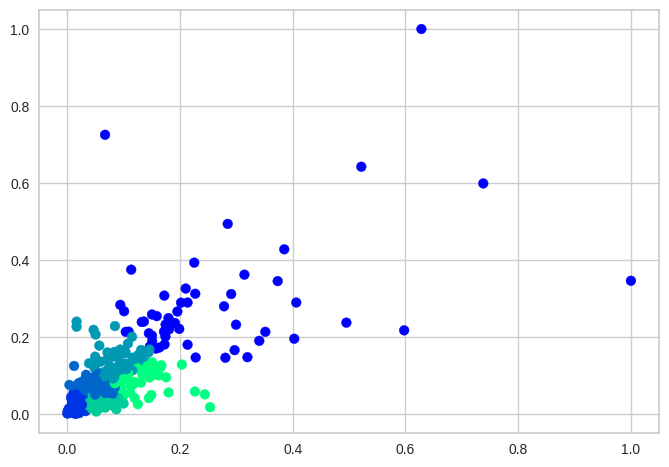


<< SILHOUETTE PARA K=6: 0.3173838777688374 >>

****************************************************************************************************
****************************************************************************************************


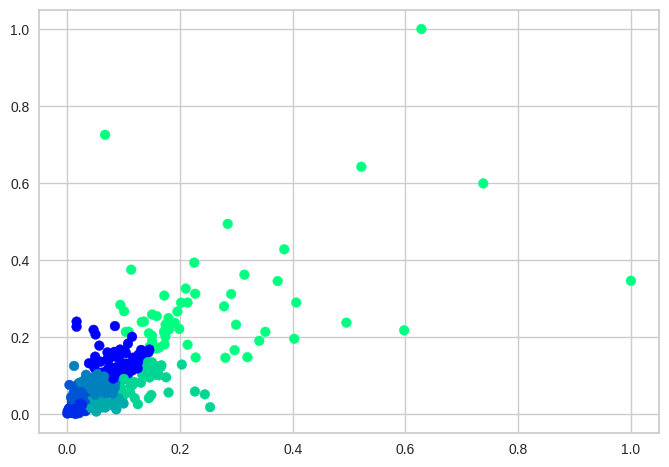


<< SILHOUETTE PARA K=7: 0.29310203683437824 >>

****************************************************************************************************
****************************************************************************************************


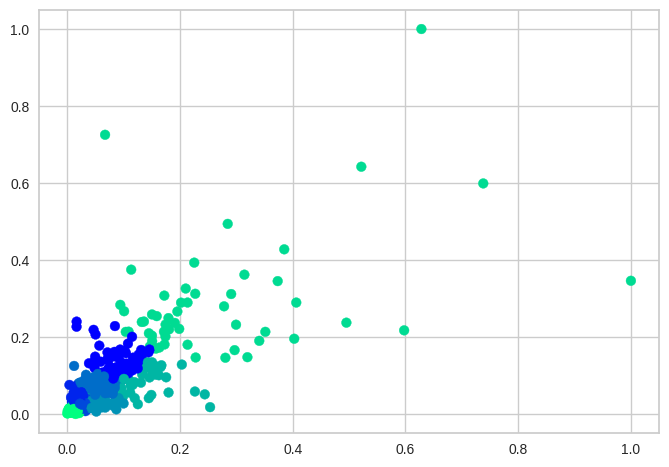


<< SILHOUETTE PARA K=8: 0.26427189534915724 >>

****************************************************************************************************
****************************************************************************************************


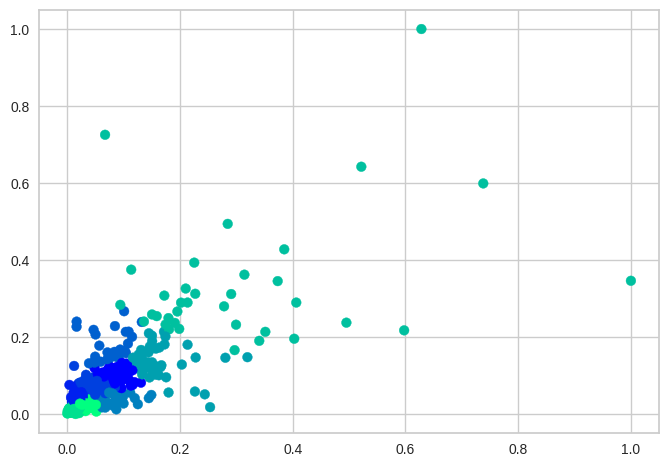


<< SILHOUETTE PARA K=9: 0.3110188892994836 >>

****************************************************************************************************


In [202]:

def generate_plot(_data, _labels):
  fig, ax = plt.subplots()

  ax.scatter(_data[3], _data[4], c=_labels, cmap="winter")

  plt.show()

  return

k_great = 2 # k ótimo
for clusters in range(k_great, 10):
  print('*'*100)
  kmedoids = KMedoids(n_clusters=clusters)
  kmedoids.fit(features)
  cluster_labels = kmedoids.fit_predict(features)
 
  generate_plot(_data=features, _labels=cluster_labels) 
  print(f'\n<< SILHOUETTE PARA K={clusters}: {metrics.silhouette_score(features, cluster_labels)} >>\n')
  print('*'*100)